In [40]:
import pandas as pd
import os
import numpy as np

In [5]:
data = pd.read_csv("2022 MLB Pitcher Probability Added.csv")

In [6]:
data.head()

,Rk,Name,Age,Tm,IP,PtchR,PtchW,Plays,WPA,WPA+,...,acLI,cClutch,RE24,REW,boLI,RE24/boLI,LevHi,LevMd,LevLo,Name-additional
0,1,Sandy Alcantara,26,MIA,228.2,43.5,4.8,920,5.4,19.7,...,0.47,0.9%,44.9,4.9,0.87,45.2,0,0,0,alcansa01
1,2,Jhoan Duran,24,MIN,67.2,15.4,1.6,280,4.6,8.9,...,1.74,0.8%,20.2,2.1,0.94,15.6,32,11,14,duranjh01
2,3,Daniel Bard,37,COL,60.1,16.1,1.7,259,4.3,10.8,...,0.79,0.2%,16.2,1.5,0.95,14.4,42,9,6,bardda01
3,4,Max Fried*,28,ATL,185.1,33.0,3.6,753,4.3,14.8,...,1.15,0.1%,39.1,4.3,0.91,43.5,0,0,0,friedma01
4,5,Justin Verlander,39,HOU,175.0,38.7,4.4,686,4.2,12.2,...,0.67,0.2%,39.4,4.5,0.86,49.1,0,0,0,verlaju01


In [7]:
print(data.columns)

Index(['Rk', 'Name', 'Age', 'Tm', 'IP', 'PtchR', 'PtchW', 'Plays', 'WPA',
       'WPA+', 'WPA-', 'aLI', 'WPA/LI', 'Clutch', 'cWPA', 'cWPA+', 'cWPA-',
       'acLI', 'cClutch', 'RE24', 'REW', 'boLI', 'RE24/boLI', 'LevHi', 'LevMd',
       'LevLo', 'Name-additional'],
      dtype='object')


In [11]:
relievers = data[data['IP'] < 100]

In [14]:
relievers['WPA'].describe()

count    731.000000
mean      -0.000137
std        0.839104
min       -2.600000
25%       -0.400000
50%        0.000000
75%        0.100000
max        4.600000
Name: WPA, dtype: float64

In [16]:
relievers['WPA'].quantile(0.95)

1.4

In [115]:
## What is a .300 Batting Average?

batting = pd.read_csv("2022 MLB Batter Standard.csv")

In [20]:
print(batting.columns)

Index(['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos Summary',
       'Name-additional'],
      dtype='object')


In [26]:
batting['BA'].quantile(0.95)

0.30074999999999996

In [27]:
## It is the 95th percentile in 2022

In [28]:
# What about an .800 OPS?

In [35]:
batting['OPS'].quantile(0.88)

0.7960000000000003

In [36]:
# We will call it the 88th percentile

In [37]:
### Now I need to figure out the function to do this that is not me doing guess and check in my head ya bum!

In [45]:
pctOBP = np.percentile(batting['OBP'], 88)
print(pctOBP)

nan


In [48]:
npOBP = np.array(batting['OBP'])

In [50]:
pctOBP = np.percentile(npOBP, 88)

In [51]:
print(pctOBP)

nan


In [52]:
# I am going to lose my fucking mind!

In [53]:
batting['OBP'].unique()

array([0.28 , 0.285, 0.276,   nan, 0.378, 0.351, 0.298, 0.245, 0.264,
       0.255, 0.313, 0.281, 0.286, 0.24 , 0.231, 0.259, 0.258, 0.294,
       0.261, 0.283, 0.158, 0.25 , 0.188, 0.26 , 0.256, 0.297, 0.282,
       0.352, 0.387, 0.   , 0.154, 0.406, 0.311, 0.339, 0.303, 0.301,
       0.309, 0.257, 0.275, 0.246, 0.15 , 0.207, 0.316, 0.358, 0.321,
       0.327, 0.375, 0.322, 0.289, 0.405, 0.278, 0.2  , 0.324, 0.287,
       0.212, 0.195, 0.296, 0.227, 0.244, 0.17 , 0.08 , 0.362, 0.384,
       0.265, 0.326, 0.373, 0.331, 0.34 , 0.333, 0.318, 0.314, 0.277,
       0.377, 0.315, 0.454, 0.118, 0.37 , 0.366, 0.4  , 0.211, 0.344,
       0.305, 0.228, 0.376, 0.284, 0.302, 0.306, 0.312, 0.274, 0.222,
       0.336, 0.33 , 0.272, 0.367, 0.183, 0.233, 0.185, 0.356, 0.425,
       0.429, 0.3  , 0.31 , 0.412, 0.325, 0.251, 0.205, 0.299, 0.291,
       0.346, 0.341, 0.197, 0.243, 0.056, 0.266, 0.138, 0.148, 0.354,
       0.349, 0.337, 0.308, 0.332, 0.319, 0.216, 0.167, 0.273, 0.361,
       0.407, 0.444,

In [54]:
batting['OBP'].describe()

count    867.000000
mean       0.278311
std        0.090516
min        0.000000
25%        0.250000
50%        0.292000
75%        0.324000
max        1.000000
Name: OBP, dtype: float64

<AxesSubplot:>

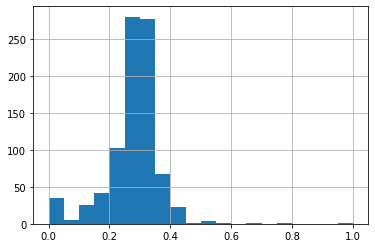

In [57]:
batting['OBP'].hist(bins = 20)

In [60]:
two_std_dev_from_mu = (batting['OBP'].mean()) + (2*(batting['OBP'].std()))

In [61]:
two_std_dev_from_mu

0.4593429754885786

In [62]:
# This means you need an OBP of .459 to be 2 standard deviations away from the mean.

In [63]:
# We know by the 68-95-99 rule that ~95% of the data exist within two standard deviations away from the mean.
# This would imply that having an OBP = .459 would put a hitter in the 95th percentile for getting on base

In [67]:
# Define Functions
def two_std_dev_from_mu(x):
    y = (x.mean()) + 2*(x.std())
    return y

In [71]:
two_std_dev_from_mu(batting['HR'])

21.9829171198611

In [232]:
final = []
for i in cols:
    x = two_std_dev_from_mu(batting[i])
    #final = final.append(x)
    final = pd.concat([final, x])
final    
#final

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [209]:
two_std_dev_from_mu(batting['IBB'])

3.7995531863809813

In [186]:
cols = [(batting.var(ddof=0))]
cols

C:\Users\Kellen\AppData\Local\Temp\ipykernel_7484\962104932.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cols = [(batting.var(ddof=0))]


[Rk      81016.250000
 Age        12.890640
 G        2607.054154
 PA      42976.283923
 AB      34365.379184
 R         685.401409
 H        2357.474847
 2B        108.146431
 3B          1.548647
 HR         65.405216
 RBI       676.811850
 SB         26.734839
 CS          2.623915
 BB        398.834421
 SO       2058.320075
 BA          0.006105
 OBP         0.008193
 SLG         0.021528
 OPS         0.048655
 OPS+     3742.319252
 TB       6595.843099
 GDP        22.178326
 HBP        11.288893
 SH          1.419632
 SF          3.586223
 IBB         2.693988
 dtype: float64]

In [185]:
batting['HR'].var()

65.47161684908538

In [207]:
cols = list(batting.columns)
cols

unwanted = ['Rk', 'Name', 'Tm', 'Lg', 'Pos Summary', 'Name-additional']

cols = [c for c in cols if c not in unwanted]
cols

['Age',
 'G',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'BA',
 'OBP',
 'SLG',
 'OPS',
 'OPS+',
 'TB',
 'GDP',
 'HBP',
 'SH',
 'SF',
 'IBB']

In [198]:
df = pd.DataFrame(cols, columns = ['Value'])
df

,Value
0,Age
1,G
2,PA
3,AB
4,R
5,H
6,2B
7,3B
8,HR
9,RBI


In [205]:
batting.var()['HR']


C:\Users\Kellen\AppData\Local\Temp\ipykernel_7484\1769905953.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  batting.var()['HR']


65.47161684908538

In [191]:
for i in batting.columns:
    print(batting[])

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
981    982.0
982    983.0
983    984.0
984    985.0
985    986.0
Name: Rk, Length: 986, dtype: float64
0           CJ Abrams*
1           CJ Abrams*
2           CJ Abrams*
3         Albert Abreu
4         Albert Abreu
            ...       
981       Jared Young*
982        Seby Zavala
983    Bradley Zimmer*
984    Bradley Zimmer*
985    Bradley Zimmer*
Name: Name, Length: 986, dtype: object
0      21.0
1      21.0
2      21.0
3      26.0
4      26.0
       ... 
981    26.0
982    28.0
983    29.0
984    29.0
985    29.0
Name: Age, Length: 986, dtype: float64
0      TOT
1      SDP
2      WSN
3      TOT
4      KCR
      ... 
981    CHC
982    CHW
983    TOT
984    TOR
985    PHI
Name: Tm, Length: 986, dtype: object
0       NL
1       NL
2       NL
3       AL
4       AL
      ... 
981     NL
982     AL
983    MLB
984     AL
985     NL
Name: Lg, Length: 986, dtype: object
0       90
1       46
2       44
3      

In [175]:
df = pd.DataFrame(np.array(cols),
                  columns = [cols[]] )
df

ValueError: Shape of passed values is (1, 26), indices imply (1, 1)

In [155]:


for i in batting.columns:
    variances['test'][i] = two_std_dev_from_mu(batting[i])
    

KeyError: 'test'

In [153]:
variances = batting.var()
variances

C:\Users\Kellen\AppData\Local\Temp\ipykernel_7484\1109648374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = batting.var()


Rk      81098.500000
Age        12.903727
G        2609.700909
PA      43019.914668
AB      34400.267894
R         686.097248
H        2359.868222
2B        108.256225
3B          1.550219
HR         65.471617
RBI       677.498968
SB         26.761981
CS          2.626579
BB        399.239329
SO       2060.409740
BA          0.006112
OBP         0.008203
SLG         0.021553
OPS         0.048711
OPS+     3746.655659
TB       6602.539386
GDP        22.200842
HBP        11.300354
SH          1.421074
SF          3.589864
IBB         2.696723
dtype: float64

In [119]:
batting = batting[:-1]

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Name-additional
0,1.0,CJ Abrams*,21.0,TOT,NL,90,302,284,33,70,...,0.604,76.0,92,5,9,2,2,0,64/H9D,abramcj01
1,2.0,CJ Abrams*,21.0,SDP,NL,46,139,125,16,29,...,0.605,77.0,40,4,6,2,2,0,64/H9D,abramcj01
2,3.0,CJ Abrams*,21.0,WSN,NL,44,163,159,17,41,...,0.603,75.0,52,1,3,0,0,0,6/H,abramcj01
3,4.0,Albert Abreu,26.0,TOT,AL,1,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,1,abreual01
4,5.0,Albert Abreu,26.0,KCR,AL,1,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,/1,abreual01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,982.0,Jared Young*,26.0,CHC,NL,6,22,19,2,5,...,0.732,108.0,7,0,0,0,0,0,/D3H9,youngja02
982,983.0,Seby Zavala,28.0,CHW,AL,61,205,178,22,48,...,0.729,107.0,68,1,3,3,2,0,2/H3D,zavalse01
983,984.0,Bradley Zimmer*,29.0,TOT,MLB,109,117,105,18,13,...,0.435,25.0,24,0,6,1,0,0,8H/D9,zimmebr01
984,985.0,Bradley Zimmer*,29.0,TOR,AL,100,101,89,14,9,...,0.413,19.0,19,0,6,1,0,0,8H/D9,zimmebr01


In [123]:
#batting['var'] = []

variances = batting.var()

#batting['var'] = 
#batting = batting.drop(columns = ['var'], axis = 1)

#varHR = batting['HR'].var()
#varHR

for i in batting.columns:
    test = variances[i]


#for i in batting.columns:
#    var = pd.var(batting[i])
#    batting['var'].append(var)

C:\Users\Kellen\AppData\Local\Temp\ipykernel_7484\1299392847.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = batting.var()


KeyError: 'Name'

In [151]:
for i in variances.index:
    print(variances.iloc[i])

TypeError: Cannot index by location index with a non-integer key

In [68]:
# Loop Function through the dataframe and append into a column that gets stuck on the end of the df
batting['m+2sd'] = []

for i in batting.columns:
    a = two_std_dev_from_mu(batting[i])
    batting['m+2sd'].append(a)

ValueError: Length of values (0) does not match length of index (988)

In [ ]:
batting['m+2sd']